In [1]:
import pandas as pd

In [2]:
Review=pd.read_csv('r D:\British Airways Data Science\BA_reviews.csv')
Review

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Ground and cabin crew alway...
1,1,✅ Trip Verified | My family flew from Washing...
2,2,✅ Trip Verified | Easy check in a T5. Galleri...
3,3,"Not Verified | Flight delayed by an hour, it ..."
4,4,Not Verified | The staff are very rude and not...
...,...,...
995,995,✅ Trip Verified | London to Toronto. 14 day t...
996,996,✅ Trip Verified | London to Vienna. I was sho...
997,997,✅ Trip Verified | Johannesburg to London. I t...
998,998,✅ Trip Verified | Singapore to London Heathro...


In [3]:
Review['reviews']

0      ✅ Trip Verified |  Ground and cabin crew alway...
1      ✅ Trip Verified |  My family flew from Washing...
2      ✅ Trip Verified |  Easy check in a T5. Galleri...
3      Not Verified |  Flight delayed by an hour, it ...
4      Not Verified | The staff are very rude and not...
                             ...                        
995    ✅ Trip Verified |  London to Toronto. 14 day t...
996    ✅ Trip Verified |  London to Vienna. I was sho...
997    ✅ Trip Verified |  Johannesburg to London. I t...
998    ✅ Trip Verified |  Singapore to London Heathro...
999    ✅ Trip Verified |  London to Los Angeles. Book...
Name: reviews, Length: 1000, dtype: object

### Define pattern of special characters

In [4]:
pattern = r'[^a-zA-Z0-9\s|]'

In [5]:
Review['reviews']=Review['reviews'].str.replace(pattern, '', regex=True)
Review['reviews']

0       Trip Verified |  Ground and cabin crew always...
1       Trip Verified |  My family flew from Washingt...
2       Trip Verified |  Easy check in a T5 Galleries...
3      Not Verified |  Flight delayed by an hour it h...
4      Not Verified | The staff are very rude and not...
                             ...                        
995     Trip Verified |  London to Toronto 14 day tri...
996     Trip Verified |  London to Vienna I was shock...
997     Trip Verified |  Johannesburg to London I ten...
998     Trip Verified |  Singapore to London Heathrow...
999     Trip Verified |  London to Los Angeles Booked...
Name: reviews, Length: 1000, dtype: object

In [6]:
Split_reviews= Review['reviews'].str.split('|', expand=True)
Split_reviews

,0,1
0,Trip Verified,Ground and cabin crew always provide good cu...
1,Trip Verified,My family flew from Washington to London on ...
2,Trip Verified,Easy check in a T5 Galleries south and North...
3,Not Verified,Flight delayed by an hour it happens no bigg...
4,Not Verified,The staff are very rude and not trained prope...
...,...,...
995,Trip Verified,London to Toronto 14 day trip to play golf w...
996,Trip Verified,London to Vienna I was shocked that BA provi...
997,Trip Verified,Johannesburg to London I tend to stay with a...
998,Trip Verified,Singapore to London Heathrow Its my first ti...


In [7]:
Split_reviews[0].value_counts()

 Trip Verified     798
Not Verified       200
 Not Verified        2
Name: 0, dtype: int64

In [49]:
# Remove leading and trailing spaces in columns
Split_reviews=Split_reviews.apply(lambda c: c.str.strip())
Split_reviews=pd.DataFrame(Split_reviews)

Trip Verified    798
Not Verified     202
Name: 0, dtype: int64

In [9]:
Review=pd.concat([Review, Split_reviews], axis=1)
Review.columns=['Id','Original reviews','Trip verified|Not verified','Reviews']
Review

,Id,Original reviews,Trip verified|Not verified,Reviews
0,0,Trip Verified | Ground and cabin crew always...,Trip Verified,Ground and cabin crew always provide good cust...
1,1,Trip Verified | My family flew from Washingt...,Trip Verified,My family flew from Washington to London on a ...
2,2,Trip Verified | Easy check in a T5 Galleries...,Trip Verified,Easy check in a T5 Galleries south and North l...
3,3,Not Verified | Flight delayed by an hour it h...,Not Verified,Flight delayed by an hour it happens no biggie...
4,4,Not Verified | The staff are very rude and not...,Not Verified,The staff are very rude and not trained proper...
...,...,...,...,...
995,995,Trip Verified | London to Toronto 14 day tri...,Trip Verified,London to Toronto 14 day trip to play golf wit...
996,996,Trip Verified | London to Vienna I was shock...,Trip Verified,London to Vienna I was shocked that BA provide...
997,997,Trip Verified | Johannesburg to London I ten...,Trip Verified,Johannesburg to London I tend to stay with an ...
998,998,Trip Verified | Singapore to London Heathrow...,Trip Verified,Singapore to London Heathrow Its my first time...


## Sentiment Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

Review['text_token']=Review['Reviews'].apply(regexp.tokenize)
Review.head(5)

,Id,Original reviews,Trip verified|Not verified,Reviews,text_token
0,0,Trip Verified | Ground and cabin crew always...,Trip Verified,Ground and cabin crew always provide good cust...,"[Ground, and, cabin, crew, always, provide, go..."
1,1,Trip Verified | My family flew from Washingt...,Trip Verified,My family flew from Washington to London on a ...,"[My, family, flew, from, Washington, to, Londo..."
2,2,Trip Verified | Easy check in a T5 Galleries...,Trip Verified,Easy check in a T5 Galleries south and North l...,"[Easy, check, in, a, T5, Galleries, south, and..."
3,3,Not Verified | Flight delayed by an hour it h...,Not Verified,Flight delayed by an hour it happens no biggie...,"[Flight, delayed, by, an, hour, it, happens, n..."
4,4,Not Verified | The staff are very rude and not...,Not Verified,The staff are very rude and not trained proper...,"[The, staff, are, very, rude, and, not, traine..."


In [12]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [13]:
# Remove stopwords
Review['text_token'] = Review['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
Review.head(5)

,Id,Original reviews,Trip verified|Not verified,Reviews,text_token
0,0,Trip Verified | Ground and cabin crew always...,Trip Verified,Ground and cabin crew always provide good cust...,"[Ground, cabin, crew, always, provide, good, c..."
1,1,Trip Verified | My family flew from Washingt...,Trip Verified,My family flew from Washington to London on a ...,"[My, family, flew, Washington, London, British..."
2,2,Trip Verified | Easy check in a T5 Galleries...,Trip Verified,Easy check in a T5 Galleries south and North l...,"[Easy, check, T5, Galleries, south, North, lou..."
3,3,Not Verified | Flight delayed by an hour it h...,Not Verified,Flight delayed by an hour it happens no biggie...,"[Flight, delayed, hour, happens, biggie, Had, ..."
4,4,Not Verified | The staff are very rude and not...,Not Verified,The staff are very rude and not trained proper...,"[The, staff, rude, trained, properly, No, exce..."


In [14]:
# Change format of text_token to string and keep only words having length greater than or equal 2 letters
Review['text_string'] = Review['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
Review[['Reviews', 'text_token', 'text_string']].head()

,Reviews,text_token,text_string
0,Ground and cabin crew always provide good cust...,"[Ground, cabin, crew, always, provide, good, c...",Ground cabin crew always provide good customer...
1,My family flew from Washington to London on a ...,"[My, family, flew, Washington, London, British...",family flew Washington London British Airways ...
2,Easy check in a T5 Galleries south and North l...,"[Easy, check, T5, Galleries, south, North, lou...",Easy check Galleries south North lounges packe...
3,Flight delayed by an hour it happens no biggie...,"[Flight, delayed, hour, happens, biggie, Had, ...",Flight delayed hour happens biggie Had change ...
4,The staff are very rude and not trained proper...,"[The, staff, rude, trained, properly, No, exce...",The staff rude trained properly exceptions mad...


In [15]:
# Create a list of all words
all_words = ' '.join([word for word in Review['text_string']])

In [16]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [17]:
#Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'flight': 1748, 'The': 1165, 'service': 654, 'London': 585, 'seat': 481, 'time': 467, 'crew': 421, 'good': 389, 'British': 384, 'seats': 384, ...})

In [18]:
#Change format of text token to string with the item in the list having minimal frequency of occurence equal to 1
Review['text_string_fdist'] = Review['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tram\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

Review['text_string_lem'] = Review['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [21]:
# check if the columns are equal
Review['is_equal']= (Review['text_string_fdist']==Review['text_string_lem'])

In [22]:
# show level count
Review.is_equal.value_counts()

True    1000
Name: is_equal, dtype: int64

In [23]:
all_words_lem = ' '.join([word for word in Review['text_string_lem']])

#### Wordcloud

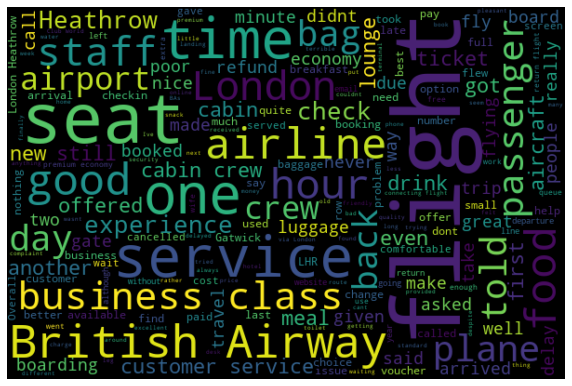

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

#### Frequency distributions

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [27]:
# Most common words
fd.most_common(5)

[('flight', 1748),
 ('The', 1165),
 ('service', 654),
 ('London', 585),
 ('seat', 481)]

In [28]:
fd.tabulate(10)

 flight     The service  London    seat    time    crew    good British   seats 
   1748    1165     654     585     481     467     421     389     384     384 


In [29]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

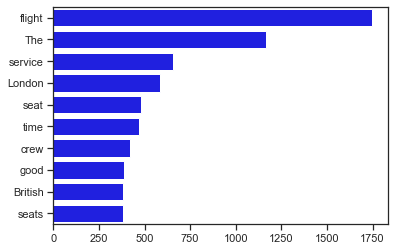

In [30]:
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [31]:
fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [32]:
# Search for specific word:
# Show frequency of a specific word
fd["comfortable"]

115

#### Sentiment Analysis

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

##### Polarity scores

In [35]:
Review['polarity'] = Review['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
Review.tail(3)

,Id,Original reviews,Trip verified|Not verified,Reviews,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
997,997,Trip Verified | Johannesburg to London I ten...,Trip Verified,Johannesburg to London I tend to stay with an ...,"[Johannesburg, London, I, tend, stay, airline,...",Johannesburg London tend stay airline frequent...,Johannesburg London tend stay airline frequent...,Johannesburg London tend stay airline frequent...,True,"{'neg': 0.086, 'neu': 0.695, 'pos': 0.219, 'co..."
998,998,Trip Verified | Singapore to London Heathrow...,Trip Verified,Singapore to London Heathrow Its my first time...,"[Singapore, London, Heathrow, Its, first, time...",Singapore London Heathrow Its first time trave...,Singapore London Heathrow Its first time trave...,Singapore London Heathrow Its first time trave...,True,"{'neg': 0.024, 'neu': 0.877, 'pos': 0.099, 'co..."
999,999,Trip Verified | London to Los Angeles Booked...,Trip Verified,London to Los Angeles Booked this trip eight m...,"[London, Los, Angeles, Booked, trip, eight, mo...",London Los Angeles Booked trip eight months pr...,London Los Angeles Booked trip eight months pr...,London Los Angeles Booked trip eight months pr...,True,"{'neg': 0.131, 'neu': 0.823, 'pos': 0.046, 'co..."


In [36]:
Review=pd.concat([
    Review.drop('polarity', axis=1), Review['polarity'].apply(pd.Series)
], axis =1
)
Review

,Id,Original reviews,Trip verified|Not verified,Reviews,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,0,Trip Verified | Ground and cabin crew always...,Trip Verified,Ground and cabin crew always provide good cust...,"[Ground, cabin, crew, always, provide, good, c...",Ground cabin crew always provide good customer...,Ground cabin crew always provide good customer...,Ground cabin crew always provide good customer...,True,0.114,0.789,0.098,0.0000
1,1,Trip Verified | My family flew from Washingt...,Trip Verified,My family flew from Washington to London on a ...,"[My, family, flew, Washington, London, British...",family flew Washington London British Airways ...,family flew Washington London British Airways ...,family flew Washington London British Airways ...,True,0.100,0.650,0.249,0.9723
2,2,Trip Verified | Easy check in a T5 Galleries...,Trip Verified,Easy check in a T5 Galleries south and North l...,"[Easy, check, T5, Galleries, south, North, lou...",Easy check Galleries south North lounges packe...,Easy check Galleries south North lounges packe...,Easy check Galleries south North lounges packe...,True,0.088,0.632,0.280,0.9415
3,3,Not Verified | Flight delayed by an hour it h...,Not Verified,Flight delayed by an hour it happens no biggie...,"[Flight, delayed, hour, happens, biggie, Had, ...",Flight delayed hour happens biggie Had change ...,Flight delayed hour happens biggie Had change ...,Flight delayed hour happens biggie Had change ...,True,0.054,0.881,0.065,0.1027
4,4,Not Verified | The staff are very rude and not...,Not Verified,The staff are very rude and not trained proper...,"[The, staff, rude, trained, properly, No, exce...",The staff rude trained properly exceptions mad...,The staff rude trained properly exceptions mad...,The staff rude trained properly exceptions mad...,True,0.270,0.730,0.000,-0.7698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Trip Verified | London to Toronto 14 day tri...,Trip Verified,London to Toronto 14 day trip to play golf wit...,"[London, Toronto, 14, day, trip, play, golf, F...",London Toronto day trip play golf Father lost ...,London Toronto day trip play golf Father lost ...,London Toronto day trip play golf Father lost ...,True,0.243,0.726,0.032,-0.9432
996,996,Trip Verified | London to Vienna I was shock...,Trip Verified,London to Vienna I was shocked that BA provide...,"[London, Vienna, I, shocked, BA, provides, buy...",London Vienna shocked provides buy onboard sho...,London Vienna shocked provides buy onboard sho...,London Vienna shocked provides buy onboard sho...,True,0.081,0.667,0.253,0.5988
997,997,Trip Verified | Johannesburg to London I ten...,Trip Verified,Johannesburg to London I tend to stay with an ...,"[Johannesburg, London, I, tend, stay, airline,...",Johannesburg London tend stay airline frequent...,Johannesburg London tend stay airline frequent...,Johannesburg London tend stay airline frequent...,True,0.086,0.695,0.219,0.9326
998,998,Trip Verified | Singapore to London Heathrow...,Trip Verified,Singapore to London Heathrow Its my first time...,"[Singapore, London, Heathrow, Its, first, time...",Singapore London Heathrow Its first time trave...,Singapore London Heathrow Its first time trave...,Singapore London Heathrow Its first time trave...,True,0.024,0.877,0.099,0.6808


In [37]:
# Create new variable with sentiment "neutral," "positive" and "negative"
Review['sentiment'] = Review['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
Review.head(4)

,Id,Original reviews,Trip verified|Not verified,Reviews,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,0,Trip Verified | Ground and cabin crew always...,Trip Verified,Ground and cabin crew always provide good cust...,"[Ground, cabin, crew, always, provide, good, c...",Ground cabin crew always provide good customer...,Ground cabin crew always provide good customer...,Ground cabin crew always provide good customer...,True,0.114,0.789,0.098,0.0000,neutral
1,1,Trip Verified | My family flew from Washingt...,Trip Verified,My family flew from Washington to London on a ...,"[My, family, flew, Washington, London, British...",family flew Washington London British Airways ...,family flew Washington London British Airways ...,family flew Washington London British Airways ...,True,0.100,0.650,0.249,0.9723,positive
2,2,Trip Verified | Easy check in a T5 Galleries...,Trip Verified,Easy check in a T5 Galleries south and North l...,"[Easy, check, T5, Galleries, south, North, lou...",Easy check Galleries south North lounges packe...,Easy check Galleries south North lounges packe...,Easy check Galleries south North lounges packe...,True,0.088,0.632,0.280,0.9415,positive
3,3,Not Verified | Flight delayed by an hour it h...,Not Verified,Flight delayed by an hour it happens no biggie...,"[Flight, delayed, hour, happens, biggie, Had, ...",Flight delayed hour happens biggie Had change ...,Flight delayed hour happens biggie Had change ...,Flight delayed hour happens biggie Had change ...,True,0.054,0.881,0.065,0.1027,positive


In [38]:
# Review with highest positive sentiment
Review.loc[Review['compound'].idxmax()].values

array([482,
       ' Trip Verified |  I was supposed to fly with Aeroflot on the 23rd of December to Moscow But because Russia has closed its borders like the majority of other countries the flight was canceled and I couldnt get home Ive also tried to fly through Antalya but the same situation occurred On my third try I came to Heathrow and tried to fly away to Cairo I was declined by another company Then I went to British Airways Starting from testing because Egypt requires tests as stressful as the whole situation was the employees were outstanding Im not sure is it connected to BA but still I want to mention this The crew was very helpful and extremely understanding very professional and urgent to help they have been a great help and I am very gracious for this I want to separately point out one employee  Shanell if I am not mistaken who works at Collision testing center in Heathrow Terminal 5 She is a savior and most importantly a human which is very rare nowadays Carrying on I wen

In [39]:
# Review with highest negative sentiment 
Review.loc[Review['compound'].idxmin()].values

array([789,
       ' Trip Verified |  London to Nashville The worst airline TransAtlantic Despite looking forward to flying on this new route to Nashville British Airways ruined this trip The flight was delayed by over three hours whilst they ostensibly replaced the damaged aircraft with an inbound Boeing 7879 from San Jose The airplane was filthy dirty in Club Class which is bad enough having to suffer the awful dated Club Class yingyang facing narrow seats with divider Business Class on British Airways is the worst of any airline The WIFI was out of service On late arrival in Nashville my luggage arrived soaking wet and I was unable to change clothes On my return to the UK I contacted British Airways Customer Relations to seek compensation and got the usual pathetic mainly computer generated insincere apology I am now forced to haggle with British Airways and endure their woeful socalled Customer Relations department It is a real shame to witness the decline of this national carrier 

#### Visualization/Analyse

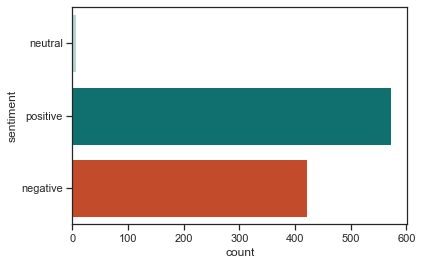

In [64]:
# Number of Reviews 
sns.countplot(y='sentiment',
             data=Review, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

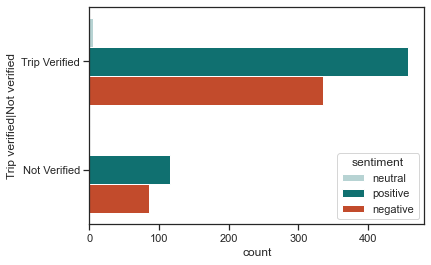

In [63]:
# Number of Reviews by trip verified
sns.countplot(y='Trip verified|Not verified',
             data=Review, 
             hue='sentiment',
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

<AxesSubplot:xlabel='compound', ylabel='Count'>

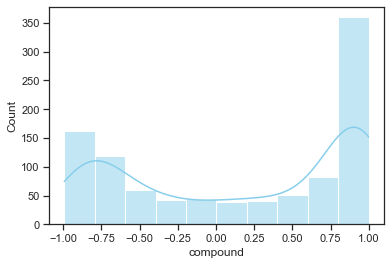

In [41]:
# Distribution of sentiment score (compound)
sns.histplot(Review['compound'], 
             bins=10, 
             kde=True, 
             color='skyblue'
            )

<AxesSubplot:ylabel='compound'>

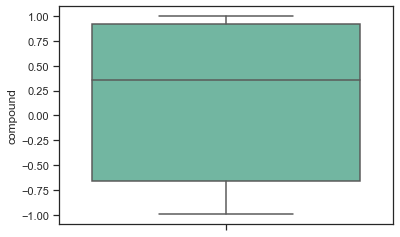

In [42]:
sns.boxplot(y='compound', 
            data=Review, 
            palette='Set2')

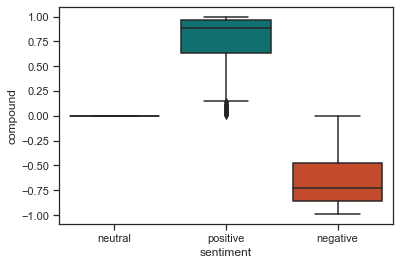

In [43]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=Review);

In [44]:
# Average compound score:
Review['compound'].mean()

0.16425089999999995

In [45]:
# Convert the average compound score to scale of 0-10:
import numpy as np
min_value= np.min(Review['compound'])
max_value= np.max(Review['compound'])
range_of_original_data = max_value - min_value
scaling_factor = 10 / range_of_original_data
rescaled_data = (Review['compound'] - min_value) * scaling_factor
rescaled_data.mean()

5.808732047805558

In [69]:
Review[Review.sentiment=='neutral'].count()

Id                            6
Original reviews              6
Trip verified|Not verified    6
Reviews                       6
text_token                    6
text_string                   6
text_string_fdist             6
text_string_lem               6
is_equal                      6
neg                           6
neu                           6
pos                           6
compound                      6
sentiment                     6
dtype: int64